# IMBd Project 

## Libraries

In [1]:
# Import Libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import fa2
import math
import community
import matplotlib.cm as cm
from __future__ import division
import matplotlib.image as mpimg
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import io
from collections import Counter
from wordcloud import WordCloud
from scipy.special import zeta
# Rendering Parameters
title_font = {'family': 'sans-serif',
        'color':  '#000000',
        'weight': 'normal',
        'size': 16,
        }

## Clean Data

We have two type of data:
* A file containing reviews
* IMBd data bases containing actors, movies and grades <br>

As Data Bases contain too many lines compared to the review files, we first have to clean our data bases files to keep only the information about the movies in the reviews file.

#### Get the review movies

In [2]:
###################################
# Initialise a movie dictionnary
###################################

# Function. to convert movie or actor id to sting key
def idToString(iD, base): # base = "tt" for movies or "nm" for actors
    if iD<10:
        return base+"000000"+str(iD)
    if iD<100:
        return base+"00000"+str(iD)
    if iD<1000:
        return base+"0000"+str(iD)
    if iD<10000:
        return base+"000"+str(iD)
    if iD<100000:
        return base+"00"+str(iD)
    if iD<1000000:
        return base+"0"+str(iD)
    else:
        return base+str(iD)
    
# Create movie dictionnary
movieDict = {}
lastMovie = 9999999 #last movie ID
for i in range(lastMovie):
    movieDict[idToString(i+1,"tt")] = False
    



In [3]:
###################################
# Get the movies to keep
###################################

# List of the reviews documents
listReviewsDocuments = ["train/urls_neg.txt","test/urls_neg.txt","train/urls_pos.txt","test/urls_pos.txt","train/urls_unsup.txt"]

# Fill in the dictionnary
for document in listReviewsDocuments:
    files = io.open("aclImdb/"+document, mode="r", encoding="utf-8")
    for row in files:
        w = re.findall(r'http://www.imdb.com/title/(\w*)/usercomments',row)
        movieDict[w[0]] = True

In [4]:
###################################
# Create an Actor Dict
###################################
actorDict = {}
lastActor = 29999999 #last movie ID
for i in range(lastActor):
    actorDict[idToString(i+1,"nm")] = False
    


#### Clean the data base documents: ONLY TO START WITH NOT CLEANED DATA

In [5]:
###################################
# key to movie name file
###################################

### FROM LARGE DATA BASES
#path = "DATA/title.basics.txt"
#cleanPath = "DATA/title.basics.clean.txt"
#files = io.open(path, mode="r", encoding="utf-8")
#cleanfile = io.open(cleanPath, mode="w", encoding="utf-8")
#b=False # skip the first line
#count =0
#for row in files:
#    if b:
#        split=row.split("\t")
#        key = split[0]
#        if movieDict[key]:
#            if (split[1] in ['movie', 'tvMovie']):
#                cleanfile.write(row)
#                count +=1
#            else:
#                movieDict[key]=False
#    else:
#        b=True
#files.close()
#cleanfile.close()


#print "There are "+str(count)+" movies considered"

In [6]:
##########################################################
# film actors links file : Clean + get actor dictionnary
##########################################################

###FROM LARGE DATA BASES
#path = "DATA/title.principals.txt"
#cleanPath = "DATA/title.principals.clean.txt"
#files = io.open(path, mode="r", encoding="utf-8")
#cleanfile = io.open(cleanPath, mode="w", encoding="utf-8")
#roleCheckList = ["actor", "actress", "self"] #check if it is an actor
#nLinks = 0
#i=False # skip first line
#for row in files:
#    if i:
#        split = row.split("\t") 
#        key = split[0]
#        if movieDict[key]:
#            if (split[3] in roleCheckList or split[4] in roleCheckList or split[5] in roleCheckList):
#                cleanfile.write(row)
#                actorDict[split[2]]=True
#                nLinks  +=1
#            
#    else:
#        i=True
#
#files.close()
#cleanfile.close()

###REMOVE ERRORS
#actorDict["nm0547707"]=False
#actorDict['nm0547707']=False
#actorDict['nm0809728']=False
#actorDict['nm2442859']=False
#actorDict['nm1996613']=False
#actorDict['nm0600636']=False
#actorDict['nm1824417']=False
#actorDict['nm2440192']=False
#actorDict['nm1754167']=False

#print "There are "+str(nLinks-9)+" actors considered"

In [7]:
###################################
# key to actor name file
###################################

###FROM LARGE DATA BASES
#path = "DATA/name.basics.txt"
#cleanPath = "DATA/name.basics.clean.txt"
#files = io.open(path, mode="r", encoding="utf-8")
#cleanfile = io.open(cleanPath, mode="w", encoding="utf-8")
#count = 0
#i=False
#for row in files:
#    if i:
#        split = row.split("\t")
#        key = split[0]
#        if actorDict[key]:
#            cleanfile.write(row)
#    else:
#        i=True

#files.close()
#cleanfile.close()

#### Start with clean data

In [8]:
###################################
# key to movie name file
###################################

movieAgeDict = {}
path = "DATA/title.basics.clean.txt"
files = io.open(path, mode="r", encoding="utf-8")
count =0
for row in files:
    split=row.split("\t")
    key = split[0]
    if movieDict[key]:
        if (split[1] in ['movie', 'tvMovie']) and not (split[5] == "\\N"):
            movieAgeDict[key] = int(split[5])
            count +=1
files.close()
        
#Clean Movie dict
for i in range(lastMovie):
    movieDict[idToString(i+1,"tt")] = False

count2 =0    
for key in movieAgeDict.keys():
    movieDict[key]=True
    count2 +=1


print "There are "+str(count)+" movies considered"
print str(count2)

There are 10735 movies considered
10735


In [9]:
##########################################################
# film actors links file : Clean + get actor dictionnary
##########################################################

path = "DATA/title.principals.clean.txt"
files = io.open(path, mode="r", encoding="utf-8")
roleCheckList = ["actor", "actress", "self"] #check if it is an actor
nLinks = 0
for row in files:
    split = row.split("\t") 
    key = split[0]
    if movieDict[key]:
        if (split[3] in roleCheckList or split[4] in roleCheckList or split[5] in roleCheckList):
            actorDict[split[2]]=True
            nLinks  +=1

files.close()

###REMOVE ERRORS
actorDict["nm0547707"]=False
actorDict['nm0547707']=False
actorDict['nm0809728']=False
actorDict['nm2442859']=False
actorDict['nm1996613']=False
actorDict['nm0600636']=False
actorDict['nm1824417']=False
actorDict['nm2440192']=False
actorDict['nm1754167']=False

print "There are "+str(nLinks-9)+" actors considered"

There are 43553 actors considered


## Load Data

In [10]:
###################################
# Create a ratings dict
###################################
ratingDict = {}
path = "DATA/ratings.txt"
files = io.open(path, mode="r", encoding="utf-8")
count = 0
i=False # skip first line
for row in files:
    if i:
        key = row[:9]
        if movieDict[key]:
            split = row.split("\t") 
            ratingDict[key] = float(split[1])
    else:
        i=True

files.close()

In [11]:
###################################
# Create a movie name dict
###################################
movieNameDict = {}
moviesList = []
path = "DATA/title.akas.clean.txt"
files = io.open(path, mode="r", encoding="utf-8")
count = 0
for row in files:
    split = row.split("\t") 
    if movieDict[split[0]] and not (split[0] in movieNameDict) and (split[0] in ratingDict) and "original" in row   :
        movieNameDict[split[0]] = split[2]
        moviesList.append(split[0])

files.close()

In [12]:
###################################
# Create an actor name dict
###################################
actorNameDict = {}
actorGenderDict = {}
actorsList = []
path = "DATA/name.basics.clean.txt"
files = io.open(path, mode="r", encoding="utf-8")
count = 0
for row in files:
    split = row.split("\t") 
    if actorDict[split[0]] and not (split[0] in actorNameDict):
        actorNameDict[split[0]] = split[1]
        if "actor" in split[4]:
            actorGenderDict[split[0]] = "M"
        else:
            actorGenderDict[split[0]] = "F"
        actorsList.append(split[0])
files.close()

In [13]:
###################################
# Build a movie data frame
###################################
moviesData = {"iD" : movieNameDict.keys(), "Title": pd.Series(np.zeros(len(moviesList))), "Rating":pd.Series(np.zeros(len(moviesList))), "Year":pd.Series(np.zeros(len(moviesList)))}
moviesDF = pd.DataFrame(moviesData)
for i in moviesDF.index:
    iD =moviesDF.loc[i].at["iD"]
    moviesDF.loc[i, "Title"]= movieNameDict[iD]
    moviesDF.loc[i, "Rating"] = ratingDict[iD]
    moviesDF.loc[i, "Year"]= movieAgeDict[iD]
moviesDF.sort_values("Rating", ascending=False).head(10)


Rating                                              Title    Year  \
8686     9.1                               The Regard of Flight  1983.0   
7737     9.0                                Notre-Dame de Paris  1999.0   
8377     8.9                                    Ko to tamo peva  1980.0   
4887     8.9                                       12 Angry Men  1957.0   
9860     8.9                                   Schindler's List  1993.0   
1157     8.9      The Lord of the Rings: The Return of the King  2003.0   
8305     8.8                                   Saban Oglu Saban  1977.0   
1389     8.8                                    Sobache serdtse  1988.0   
2151     8.8                                  The Art of Amália  2000.0   
9079     8.8  The Lord of the Rings: The Fellowship of the Ring  2001.0   

             iD  
8686  tt0134050  
7737  tt0285800  
8377  tt0076276  
4887  tt0050083  
9860  tt0108052  
1157  tt0167260  
8305  tt0253614  
1389  tt0096126  
2151  tt0204839  
9079  tt0120737

In [14]:
###################################
# Build an actor data frame
###################################
actorsData = {"iD": actorNameDict.keys(), "Name": pd.Series(np.zeros(len(actorsList))),"Gender": pd.Series(np.zeros(len(actorsList)))}
actorsDF = pd.DataFrame(actorsData)
for i in actorsDF.index:
    iD = actorsDF.loc[i].at["iD"]
    actorsDF.loc[i, "Name"]= actorNameDict[iD]
    actorsDF.loc[i, "Gender"] = actorGenderDict[iD]
actorsDF.head(10)

Gender                      Name         iD
0      F             Bobbie Bresee  nm0107679
1      F   Malgorzata Rozniatowska  nm0747647
2      M              Ahmet Ugurlu  nm0880128
3      F              Laura Nativo  nm1137466
4      F            Jordy Benattar  nm0070237
5      M                Özkan Ugur  nm0880126
6      M                 John Foss  nm1458561
7      M  Panayiotis Hartomatzidis  nm0367186
8      M            Simon Abkarian  nm0008787
9      F             Victoria Snow  nm0795281

In [15]:
###################################
# Create a links list
###################################
path = "DATA/title.principals.clean.txt"
files = io.open(path, mode="r", encoding="utf-8")
links = np.empty((nLinks,2),dtype=object)
count = 0
for row in files:
    split = row.split("\t")
    if actorDict[split[2]]:
        links[count,0]= split[0]
        links[count,1]= split[2]
        count+=1

files.close()

In [16]:
###################################
# Create an actor links list
###################################
actorsLinks = []
for i in range(count-1):
    j = i+1
    while (j<count) and (links[i,0]==links[j,0]):
        actorsLinks.append([links[i,1],links[j,1],links[i,0]]) #[actor1, actor2, movie]
        j+=1

## Create the graph

In [17]:
###################################
# Create the actors Graph
###################################
G = nx.Graph()
#add nodes
for i in actorsDF.index:
    G.add_node(actorsDF.loc[i].at["iD"], Name= actorsDF.loc[i, "Name"], Gender = actorsDF.loc[i, "Gender"])

#add links
for link in actorsLinks:
    if link[0]  != link[1]: 
        if G.has_edge(link[0],link[1]):                         
            G[link[0]][link[1]]["weight"] +=1 
            G[link[0]][link[1]]["movies"].append(link[2])
            G[link[0]][link[1]]["avRating"] = (G[link[0]][link[1]]["avRating"])*(1-1.0/G[link[0]][link[1]]["weight"])+ratingDict[link[2]]/G[link[0]][link[1]]["weight"]
            G[link[0]][link[1]]["avYear"] = (G[link[0]][link[1]]["avYear"])*(1-1.0/G[link[0]][link[1]]["weight"])+movieAgeDict[link[2]]/G[link[0]][link[1]]["weight"]
        else:
            G.add_edge(link[0], link[1], weight = 1, movies = [link[2]], avRating = ratingDict[link[2]], avYear = movieAgeDict[link[2]]) 


In [18]:
###################################
# Remove degree 0 nodes
###################################
nodes = [n for n in G.nodes()]
for n in nodes:
    if G.degree[n]<1:
        G.remove_node(n)

In [19]:
G.number_of_nodes()

23959

In [20]:
G =  max(nx.connected_component_subgraphs(G), key=len)
G.number_of_nodes()

16759

## Visualize the network

In [21]:
#----------------------
# PREPARE THE DRAWING
#----------------------

mBlue = "#55638A"     # For actor
fRed = "#9E1030"    # For actress
colors = {}  # Build the color and size arrays
exclusion = []
k=0
for n in G.nodes:
    try:
        if G.nodes[n]['Gender'] == "F":    # Set the colors according to the party
            colors[n]= fRed
        else:
            colors[n]= mBlue
    except:
        exclusion.append(n)
    

# Get the weight of the edges to adapt the width of the edges 
edges,weights = zip(*nx.get_edge_attributes(G,"weight").items())

#EDGE Color
c1930 = "#c12424"
c1955 = "#ff6612"
c1980 = "#ffce00"
c1995 = "#e3f018"
cNow = "#bdff00"
edgesColors = {}  
for e in G.edges:
    edgesColors[e] = c1930
    if G.get_edge_data(*e)["avYear"]>1930:
        edgesColors[e] = c1955
    if G.get_edge_data(*e)["avYear"]>1955:
        edgesColors[e] = c1980
    if G.get_edge_data(*e)["avYear"]>1980:
        edgesColors[e] = c1995
    if G.get_edge_data(*e)["avYear"]>1995:
        edgesColors[e] = cNow
    


In [22]:
# Get the actor/actress with the biggest number of collaborations
sizes = {}
actorsDF["Collab"] = pd.Series(np.zeros(len(actorsList)))
for i in actorsDF.index:
    iD =actorsDF.loc[i].at["iD"]
    if iD in G.nodes():
        edges = list(G.edges(iD))
        ogStrength = 0
        for e in edges:
            ogStrength += G.get_edge_data(*e)["weight"] 
        actorsDF.loc[i, "Collab"]= ogStrength 
        sizes[iD] = ogStrength
    else :
        actorsDF.loc[i, "Collab"]= 0
actorsDF=actorsDF.sort_values("Collab", ascending=False)

# Build a label dictionnary with the name of the congress members to highlight
SortedNames = np.asarray(actorsDF["Name"])
SortedNames = SortedNames[:10]
labels = {}
for n in G.nodes():
    name = actorNameDict[n]
    if name in SortedNames:
        labels[n]="\n\n"+name
    else:
        labels[n]=""

In [29]:
#--------------------------------------------
# USE THE FA ALGORITHM TO SET THE POSITIONS
#--------------------------------------------

# Get the Force Atlas positions (~Takes 15mn)
forceatlas2 = fa2.ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=False,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=1.0,

                          # Performance
                          jitterTolerance=1.0,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=1.2,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=0.005,
                          strongGravityMode=False,
                          gravity=20,

                          # Log
                          verbose=True)

#pos = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=3000)

##Build a shortcut to speed up and not re-run the algorithm
##Store the positions in a text file
#path = "DATA/forceAtlasPositions.txt"
#files = io.open(path, mode="w", encoding="utf-8")
#for key in pos.keys():
#    row = key +"\t" + str(pos[key][0]) +"\t"+str(pos[key][1])+"\r\n"
#    files.write(row.replace("u'","").replace("'",""))
#files.close()

#Get the Dictionnary
pos={}
path = "DATA/forceAtlasPositions.txt"
files = io.open(path, mode="r", encoding="utf-8")
for row in files:
    split = row.split("\t")
    pos[split[0]] = (float(split[1]),float(split[2]))
files.close()


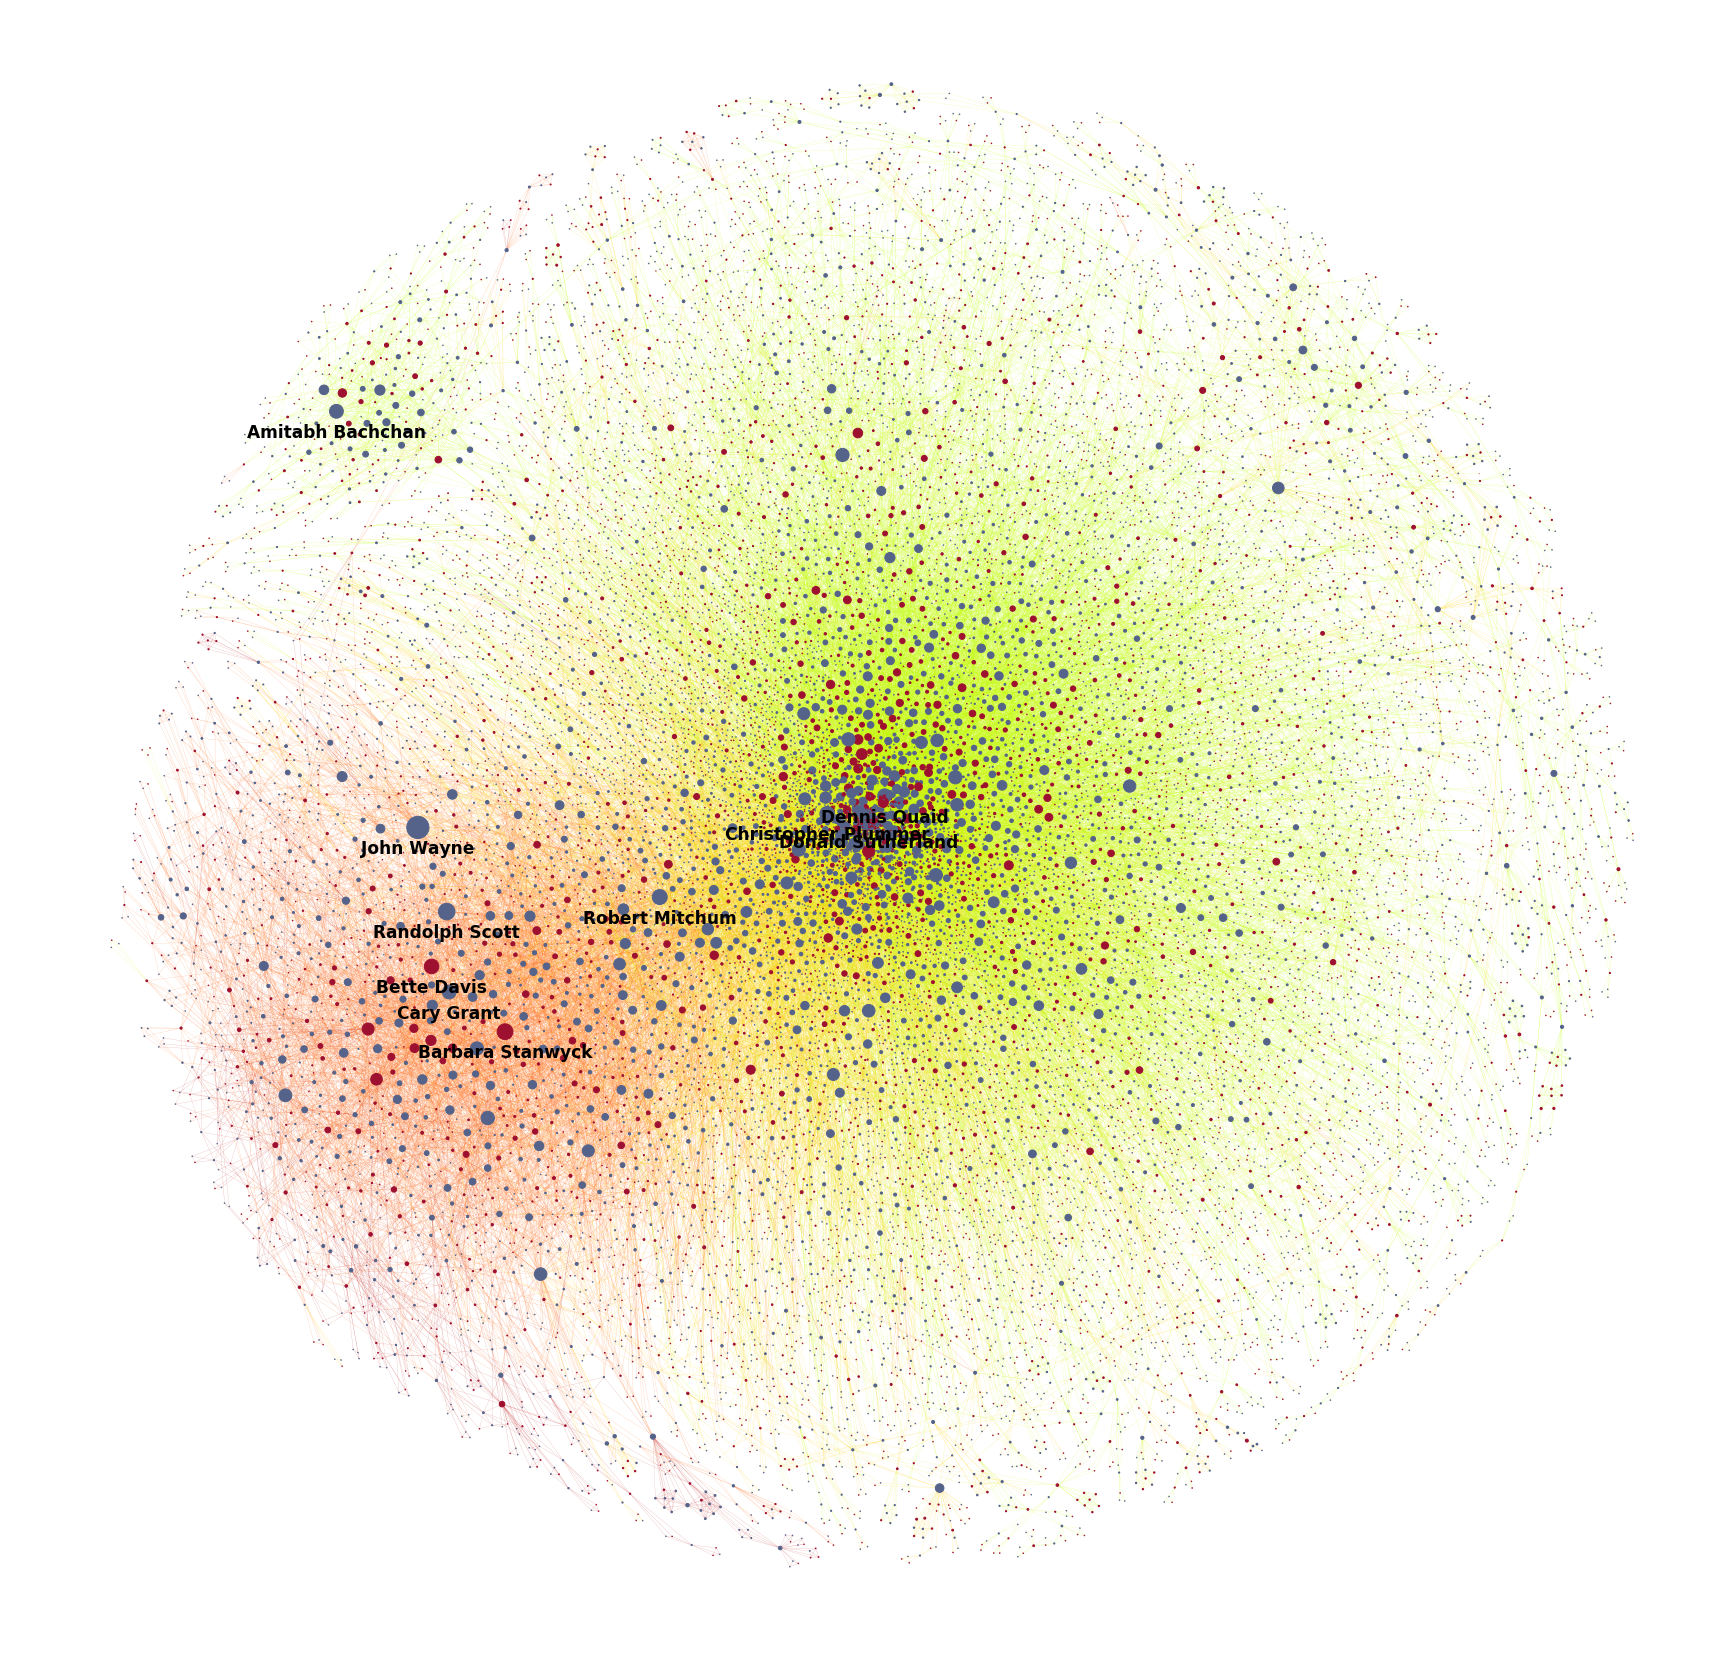

In [24]:
#-------
# DRAW
#-------

fig = plt.figure(figsize=(30, 30))
nx.draw_networkx(G, pos, 
                 node_size = [(0.2*sizes[n])**(2) for n in G.nodes()],  node_color = [colors[n] for n in G.nodes()],
                 with_labels=True,
                 width = 0.1,edge_color=[edgesColors[e] for e in G.edges()],labels = labels,font_size = 17, font_weight= "bold")
plt.axis('off')
base = 'Figures/actorGraph'
plt.savefig(base+'.eps', bbox_inches='tight')
plt.savefig(base+'.pdf', bbox_inches='tight')
plt.savefig(base+'.jpeg', bbox_inches='tight')
plt.savefig(base+'.png', bbox_inches='tight')
plt.savefig(base+'.svg', bbox_inches='tight')
plt.show()

## Graph per period

In [25]:
###################################
# Graph per period function
###################################
def graphPeriod(start,end):
    G_per = nx.Graph()
    #add nodes
    for i in actorsDF.index:
        G_per.add_node(actorsDF.loc[i].at["iD"], Name= actorsDF.loc[i, "Name"], Gender = actorsDF.loc[i, "Gender"])

    #add links
    for link in actorsLinks:
        if (start < movieAgeDict[link[2]]) and (movieAgeDict[link[2]]<= end):
            if link[0]  != link[1]: 
                if G_per.has_edge(link[0],link[1]):                         
                    G_per[link[0]][link[1]]["weight"] +=1 
                    G_per[link[0]][link[1]]["movies"].append(link[2])
                    G_per[link[0]][link[1]]["avRating"] = (G_per[link[0]][link[1]]["avRating"])*(1-1.0/G_per[link[0]][link[1]]["weight"])+ratingDict[link[2]]/G_per[link[0]][link[1]]["weight"]
                    G_per[link[0]][link[1]]["avYear"] = (G_per[link[0]][link[1]]["avYear"])*(1-1.0/G_per[link[0]][link[1]]["weight"])+movieAgeDict[link[2]]/G_per[link[0]][link[1]]["weight"]
                else:
                    G_per.add_edge(link[0], link[1], weight = 1, movies = [link[2]], avRating = ratingDict[link[2]], avYear = movieAgeDict[link[2]]) 

    #take the giant component
    G_per=max(nx.connected_component_subgraphs(G_per), key=len)
    print "There are "+str(G_per.number_of_nodes()) +" nodes(actors) and "+ str(G_per.number_of_edges())+ " links(movie collaboration) in "+str(start)+'-'+str(end)+" period."
    return G_per



In [26]:
G_5070 = graphPeriod(1950,1970)

There are 1642 nodes(actors) and 4384 links(movie collaboration) in 1950-1970 period.


In [27]:
#--------------
# DRAW FUNCTION
#--------------
def getSecond(a):
    return a[1]

def draw(graph,ttl):
    #COLORS
    mBlue = "#55638A"     # For actor
    fRed = "#9E1030"    # For actress
    colors = {}  # Build the color and size arrays
    exclusion = []
    k=0
    for n in graph.nodes:
        try:
            if graph.nodes[n]['Gender'] == "F":    # Set the colors according to the party
                colors[n]= fRed
            else:
                colors[n]= mBlue
        except:
            exclusion.append(n)

    #SIZE
    # Get the actor/actress with the biggest number of collaborations
    sizes = {}
    os = []
    sizeMax =0
    for iD in graph.nodes():
        edges = list(graph.edges(iD))
        ogStrength = 0
        for e in edges:
            ogStrength += graph.get_edge_data(*e)["weight"] 
        sizes[iD] = ogStrength
        os.append((graph.nodes[iD]["Name"],ogStrength))
        if ogStrength > sizeMax:
            sizeMax = ogStrength

    #LABEL
    # Build a label dictionnary with the name of the members to highlight
    SortedNames = np.asarray(sorted(os, key=getSecond,reverse = True))[:,0]
    SortedNames = SortedNames[:10]
    labels = {}
    for n in graph.nodes():
        name = actorNameDict[n]
        if name in SortedNames:
            labels[n]="\n\n"+name
        else:
            labels[n]=""

    #POSITIONNING
    positions = forceatlas2.forceatlas2_networkx_layout(graph, pos=None, iterations=3000)

    alpha =20/sizeMax
    fig = plt.figure(figsize=(30, 30))
    nx.draw_networkx(graph, positions, 
                     node_size = [(alpha*sizes[n])**(2.5) for n in graph.nodes()],  node_color = [colors[n] for n in graph.nodes()],
                     with_labels=True,
                     width = 0.1,edge_color='#999999',labels = labels,font_size = 17, font_weight= "bold")
    plt.axis('off')
    base = 'Figures/actorGraph_'+ttl
    plt.savefig(base+'.eps', bbox_inches='tight')
    plt.savefig(base+'.pdf', bbox_inches='tight')
    plt.savefig(base+'.jpeg', bbox_inches='tight')
    plt.savefig(base+'.png', bbox_inches='tight')
    plt.savefig(base+'.svg', bbox_inches='tight')
    plt.show()



100%|██████████| 3000/3000 [00:42<00:00, 71.06it/s]


('BarnesHut Approximation', ' took ', '20.54', ' seconds')
('Repulsion forces', ' took ', '17.84', ' seconds')
('Gravitational forces', ' took ', '0.16', ' seconds')
('Attraction forces', ' took ', '0.12', ' seconds')
('AdjustSpeedAndApplyForces step', ' took ', '0.89', ' seconds')


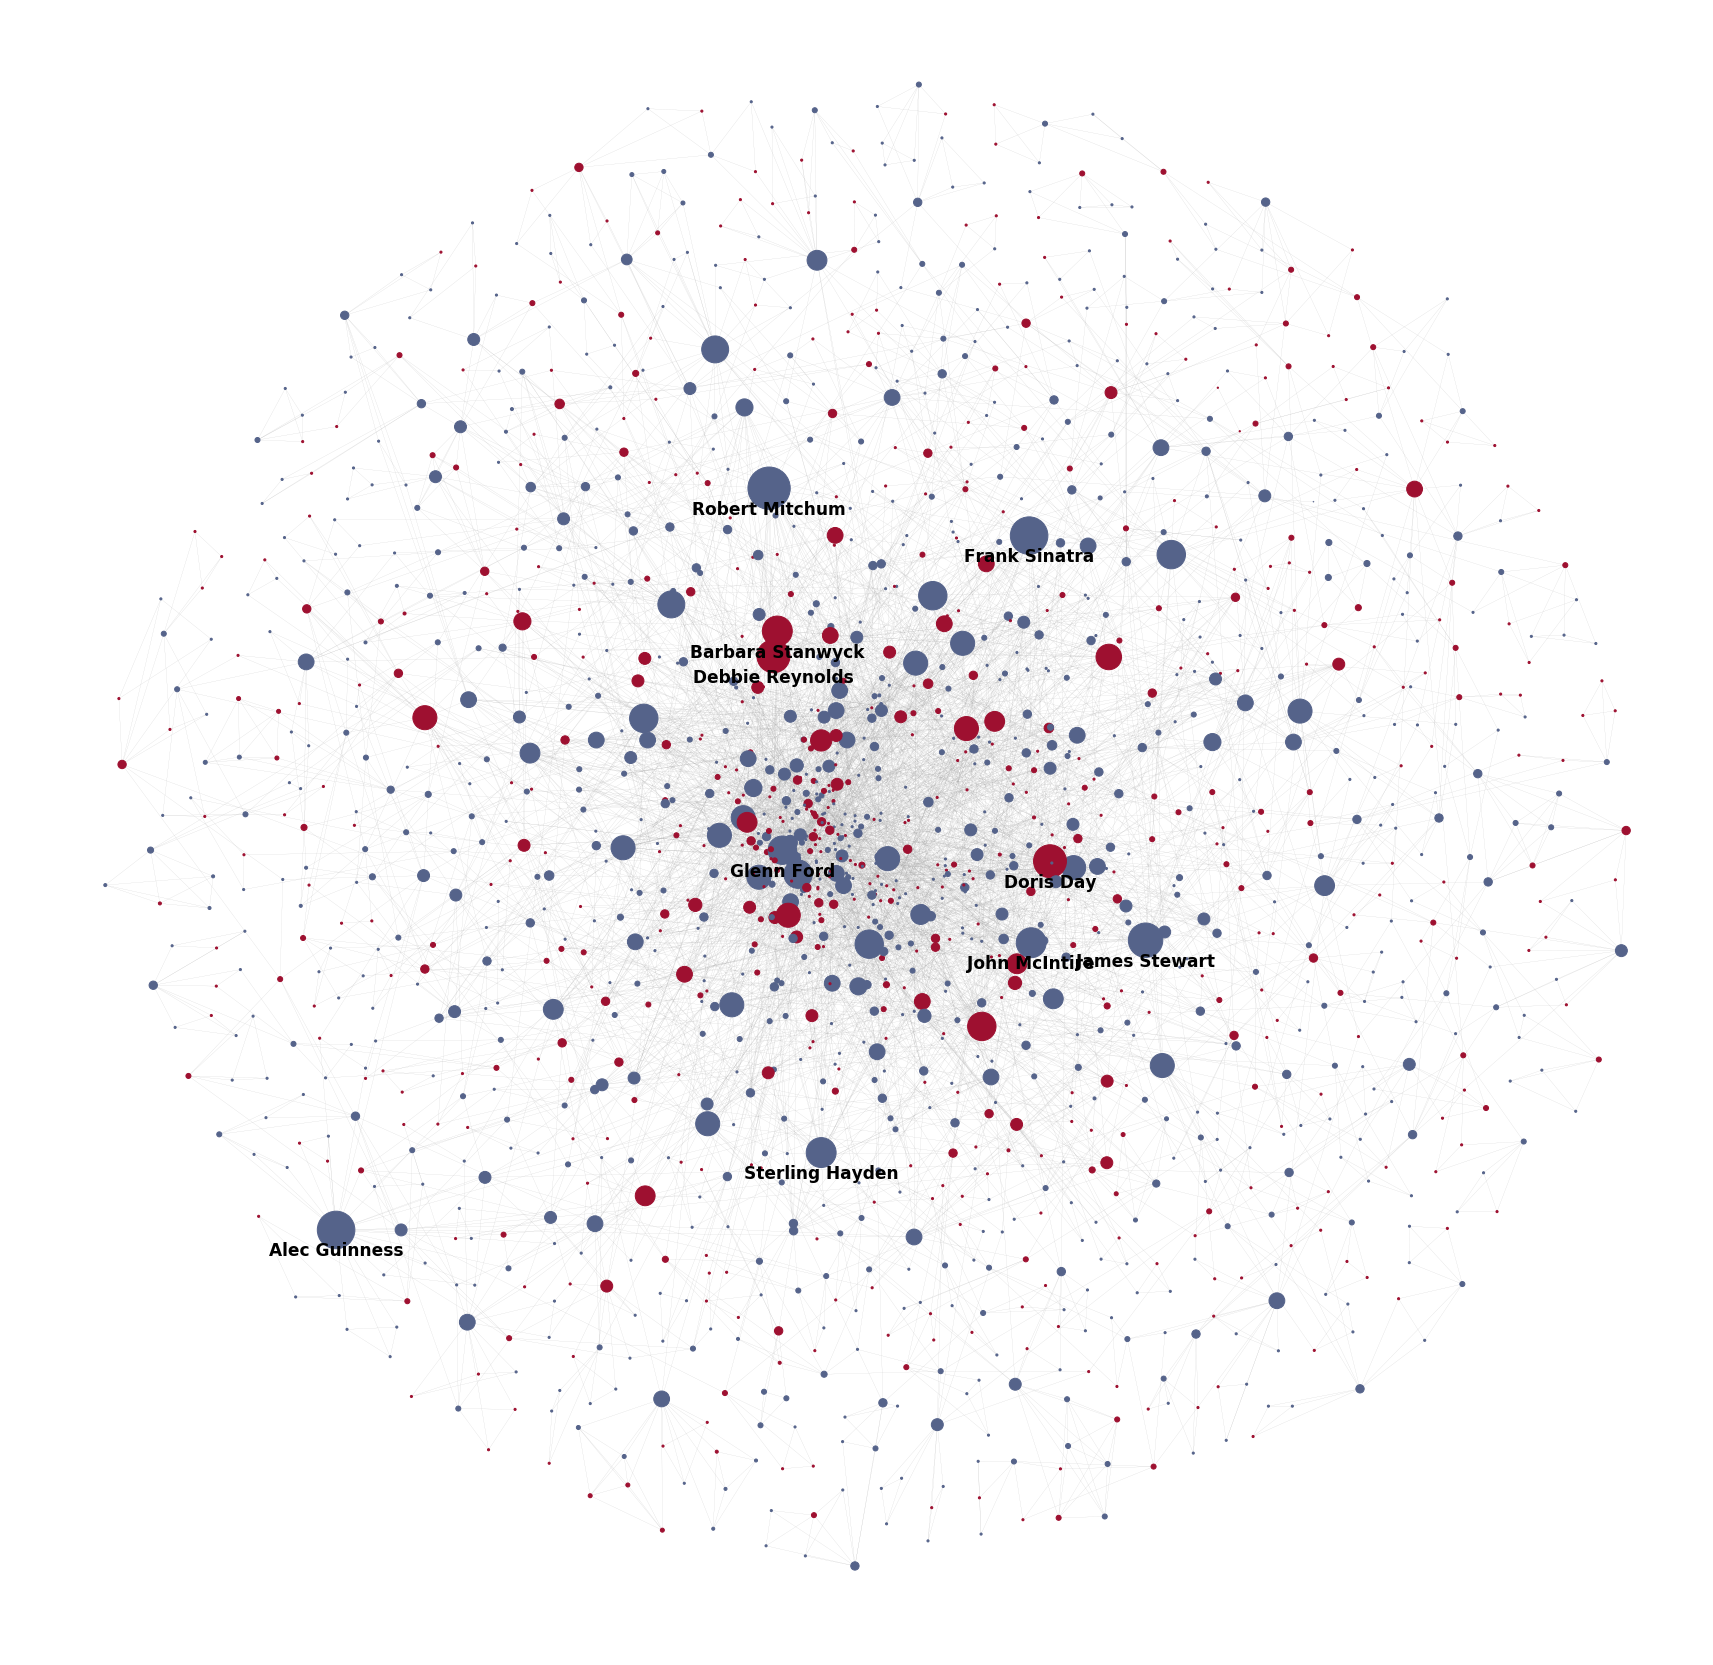

In [30]:
draw(G_5070,"1950-1970")

## Basic statistics 

### Nodes & Edges

In [32]:
print "There are "+str(G.number_of_nodes()) +" nodes(actors) and "+ str(G.number_of_edges())+ " links(movie collaboration)."

There are 16759 nodes(actors) and 55101 links(movie collaboration).


### Degree Distributions

In [33]:
#---------------------
# HISTOGRAM FUNCTION
#---------------------

def histogram(degrees, dens):
    # Computing Bins
    min_bin = np.amin(degrees)
    max_bin = np.amax(degrees)
    nb_bins = int(math.ceil(max_bin)-math.floor(min_bin))
    v = np.empty(nb_bins+1)
    v[nb_bins] = int(math.ceil(max_bin))
    bins = np.empty(nb_bins)
    for i in range(nb_bins):
        v[i] = int(min_bin + i)
        bins[i] = int(min_bin + i)

    #Hist
    hist, bin_edges = np.histogram(degrees,bins = v,density=dens)
    return hist, bin_edges

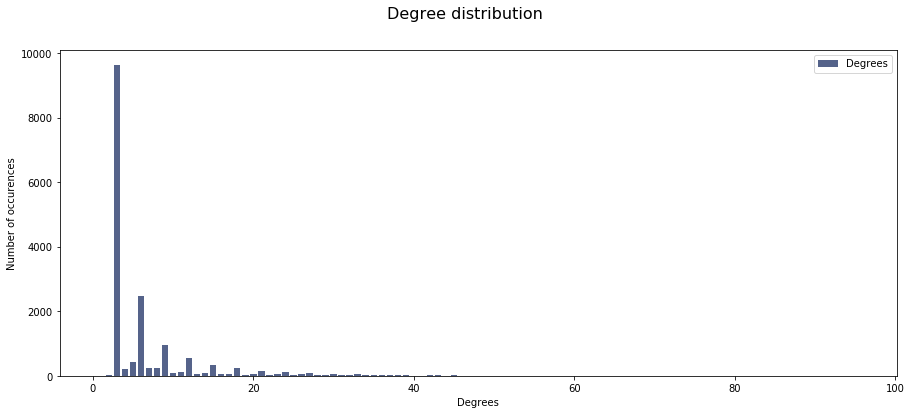

In [34]:
#-------------------------------
# DISPLAY THE DEGREE HISTOGRAM 
#-------------------------------

# Get the degrees
degrees = [G.degree(n) for n in G.nodes()]

# Get the histograms
hist, bins = histogram(degrees,False)
histD, binsD = histogram(degrees,True)

# Plot
plt.figure(figsize = (15,6))
plt.bar(bins[:-1], hist, 0.8, color=mBlue, label = "Degrees")
plt.xlabel('Degrees')
plt.ylabel('Number of occurences')
plt.suptitle('Degree distribution', fontsize=16)
plt.legend()
base = 'Figures/degreeDist'
plt.savefig(base+'.eps', bbox_inches='tight')
plt.savefig(base+'.pdf', bbox_inches='tight')
plt.savefig(base+'.jpeg', bbox_inches='tight')
plt.savefig(base+'.png', bbox_inches='tight')
plt.show()

In [35]:
#Defining functions to plot against a random network and a scale free network
def PoissDegree(ks,avg):
    return [np.exp(-avg)*avg**k/math.factorial(int(k)) for k in ks]
def ScaleFreeDegree(ks,gamma):
    return [k**(-gamma)/zeta(gamma) for k in ks]

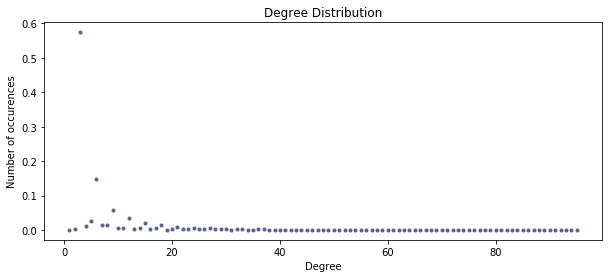

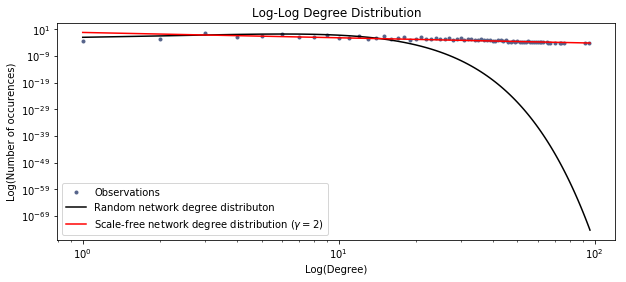

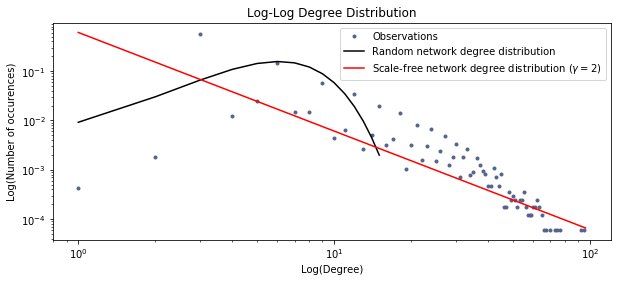

In [36]:
# Normal plot        
plt.figure(figsize = (10,4))
plt.title("Degree Distribution")
plt.plot(binsD[:-1], histD, '.', color=mBlue)
plt.xlabel('Degree')
plt.ylabel('Number of occurences')
plt.show()

# Log-Log Plot
plt.figure(figsize = (10,4))
plt.title("Log-Log Degree Distribution")
plt.loglog(binsD[:-1], histD, '.', color=mBlue)
plt.xlabel('Log(Degree)')
plt.ylabel('Log(Number of occurences)')
avg = np.mean(degrees)
ks = np.linspace(1,np.max(degrees),np.max(degrees))
plt.loglog(ks,PoissDegree(ks,avg),"-",color="k")
plt.loglog(ks,ScaleFreeDegree(ks,2),"-",color="r")
plt.legend(["Observations","Random network degree distributon","Scale-free network degree distribution ($\gamma = 2$)"])
base = 'Figures/loglogDegreeDist'
plt.savefig(base+'.eps', bbox_inches='tight')
plt.savefig(base+'.pdf', bbox_inches='tight')
plt.savefig(base+'.jpeg', bbox_inches='tight')
plt.savefig(base+'.png', bbox_inches='tight')
plt.show()

# Log-Log Plot zoom on scale free
plt.figure(figsize = (10,4))
plt.title("Log-Log Degree Distribution")
plt.loglog(binsD[:-1], histD, '.', color=mBlue)
plt.xlabel('Log(Degree)')
plt.ylabel('Log(Number of occurences)')
avg = np.mean(degrees)
ks = np.linspace(1,np.max(degrees),np.max(degrees))
ks2 = np.linspace(1,15,15)
plt.loglog(ks2,PoissDegree(ks2,avg),"-",color="k")
plt.loglog(ks,ScaleFreeDegree(ks,2),"-",color="r")
plt.legend(["Observations","Random network degree distribution","Scale-free network degree distribution ($\gamma = 2$)"])
base = 'Figures/loglogZoomDegreeDist'
plt.savefig(base+'.eps', bbox_inches='tight')
plt.savefig(base+'.pdf', bbox_inches='tight')
plt.savefig(base+'.jpeg', bbox_inches='tight')
plt.savefig(base+'.png', bbox_inches='tight')
plt.show()